In [1]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
import os
plt.style.use('/home/gridsan/gschuette/universal/matplotlib/plot_style_2.txt')

In [16]:
gm_fp = lambda chrom: f'../data/outside/dnase/GM12878_hg19_{chrom}.pkl'
imr_fp = lambda chrom: f'../data/outside/dnase/IMR90_hg19_{chrom}.pkl'
rosetta_fp = '../data/embeddings_64_after_transformer/rosetta_stone.pkl'

gm_data_dirs = [
    '../data/samples/origami_64_no_embed_reduction/eval_mode/',
    '../data/samples/origami_64_no_embed_reduction/cross_validation/GM/'
]
imr_data_dirs = [
    '../data/samples/origami_64_no_embed_reduction/cross_validation/IMR/'
]

save_folder = './dnase_seq/'#'./GM_vs_IMR2/'

region_length=1_280_000
plotting_resolution = 1_000

In [3]:
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

In [4]:
def get_genomic_index(chrom,region_index,rosetta=pd.read_pickle(rosetta_fp)):
    return rosetta[chrom][region_index][-1]
    
def parse_filename(f):
    f = f.split('_')
    if f[0] == 'sample':
        chrom = f[-1].split('.')[0]
        region_idx = int(f[1])
    elif f[0] == 'chr':
        chrom = f[1]
        region_idx = int(f[2])
    else:
        raise Exception(f"File {'_'.join(f)} cannot be interpreted")
    genomic_index = get_genomic_index(chrom,region_idx)
    return chrom, region_idx, genomic_index

def coarsen_data(data,resolution=plotting_resolution):
    # Must provide flattened data
    n = len(data) // resolution
    return data.reshape(n,resolution).mean(1)

In [13]:
def plot_dnase(data,start,resolution=plotting_resolution,orientation='left', other_data=None):

    data = coarsen_data(data,resolution)
    
    fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(.7,2),layout='constrained')

    #start = start // 1_000_000
    #stop = start + len(data)*resolution//1_000_000
    x = torch.arange(start,start + len(data)*resolution, resolution)
    x = x/1_000_000
    ax.plot(data,x)

    xmax = data.max()
    if other_data is not None:
        xmax = max(xmax,coarsen_data(other_data,resolution).max())
        
    #ax.set_xlim(list( reversed( ax.get_xlim() ) ))
    ax.set_ylim([x.max(),x.min()])
    yticks = [ round(v,2) for v in ax.get_ylim()]
    if orientation == 'left':
        ax.set_yticks(yticks,yticks,rotation='vertical')
        ax.set_ylabel('Genomic index (Mb)')
        ax.set_xlim([xmax*1.075,-xmax*.075])
    elif orientation == 'right':
        ax.set_xlim([-xmax*.075,xmax*1.075])
        ax.yaxis.set_label_position("right")
        ax.yaxis.tick_right()
        ax.set_yticks(yticks,yticks,rotation=270)#'vertical')
        ylim = ax.get_ylim()
        #y = (ylim[0]+ylim[1])/2
        #x = ax.get_xlim()[-1]*1.5
        ax.set_ylabel('Genomic index (Mb)',rotation=270,x=1, y=.5,va='center',ha='center')
    
    
    return fig, ax


In [6]:
'''
gm_regions = {}
imr_regions = {}
for regions,dirs in [(gm_regions,gm_data_dirs),(imr_regions,imr_data_dirs)]:
    for d in dirs:
        for f in os.listdir(d):
            try:
                chrom,region_idx,genomic_idx = parse_filename(f)
            except:
                continue
            if chrom not in regions:
                regions[chrom] = []
            regions[chrom].append( (region_idx, genomic_idx) ) 
'''
plotted_regions = {
    '2':[(3993,79_860_000)],
    '5':[(1618,32_360_000)],
    '6':[(290,6_000_000),(6358,131_860_000)],
    '21':[(668,28_500_000)]
}
gm_regions = plotted_regions
imr_regions = plotted_regions

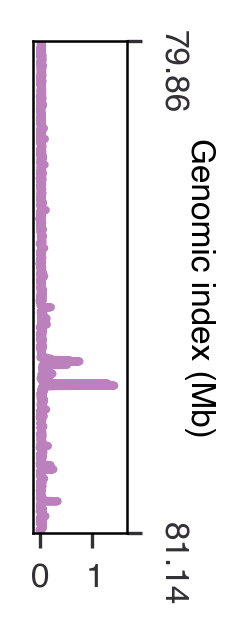

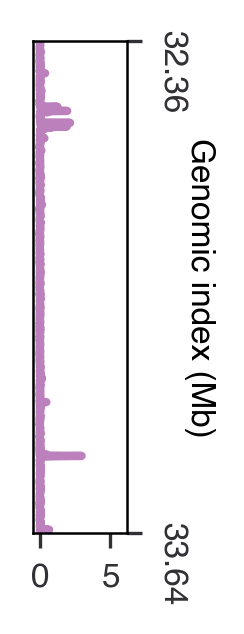

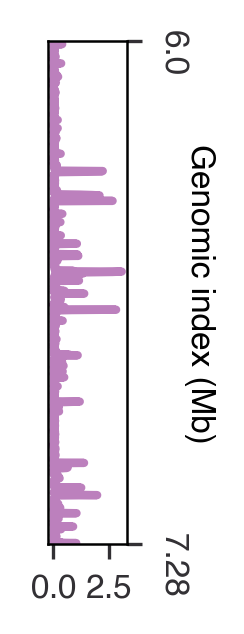

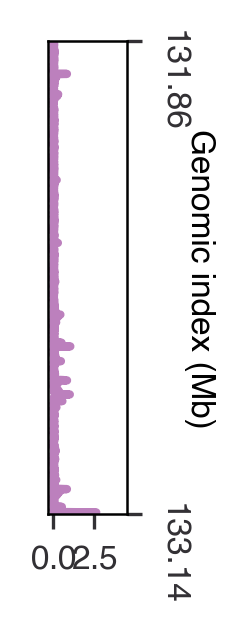

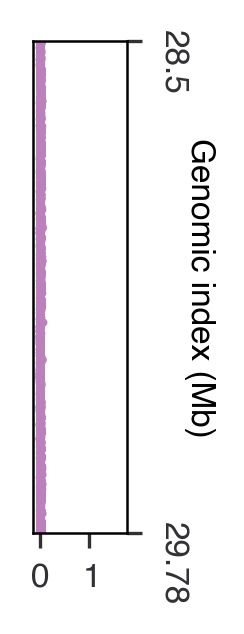

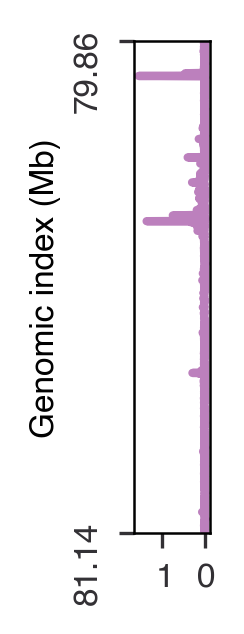

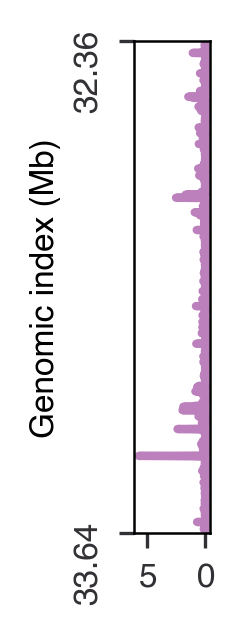

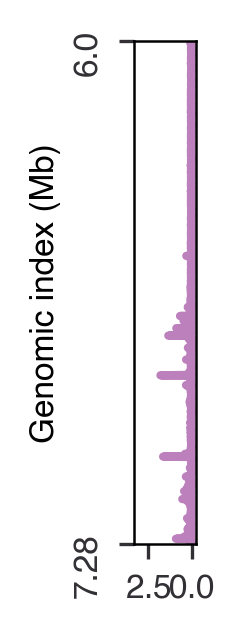

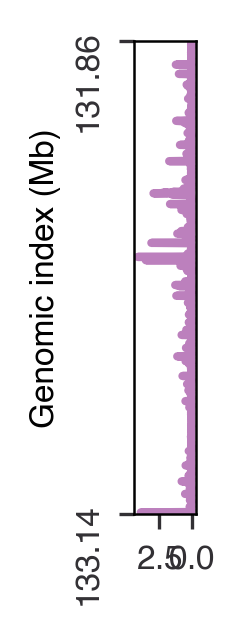

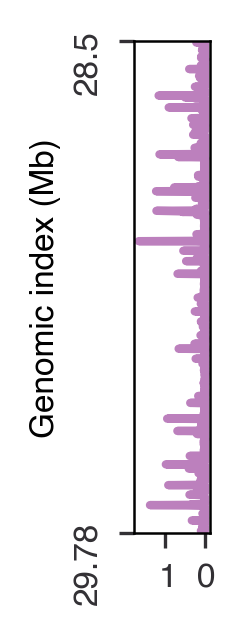

In [17]:
for regions,cell_type in [(gm_regions,'GM'),(imr_regions,'IMR')]:

    for chrom in regions:
        #f = gm_fp(chrom) if cell_type=='GM' else imr_fp(chrom)
        #dnase_data = pd.read_pickle(f)

        gm_dnase_data = pd.read_pickle(gm_fp(chrom))
        imr_dnase_data = pd.read_pickle(imr_fp(chrom))
        dnase_data = gm_dnase_data if cell_type == 'GM' else imr_dnase_data
        other_dnase_data = imr_dnase_data if cell_type == 'GM' else gm_dnase_data
        
        for region_idx,genomic_idx in regions[chrom]:
            orientation = 'left' if cell_type == 'IMR' else 'right'
            
            fig,ax = plot_dnase(
                dnase_data[0,genomic_idx:genomic_idx+region_length].toarray().flatten(),
                genomic_idx,
                orientation=orientation,
                other_data=other_dnase_data[0,genomic_idx:genomic_idx+region_length].toarray().flatten()
            )
            fig.savefig(save_folder + f'chrom_{chrom}_{genomic_idx}_{cell_type}_dnase_new_version.pdf',transparent=True)


Original version

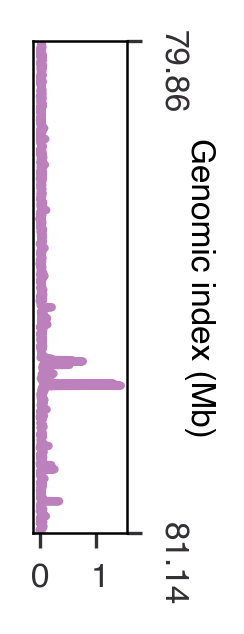

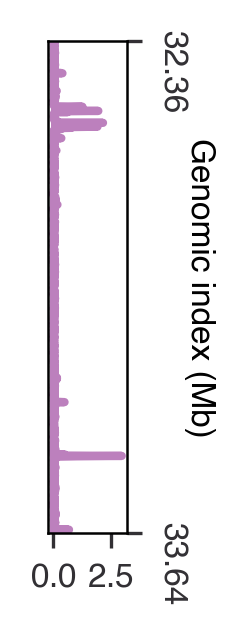

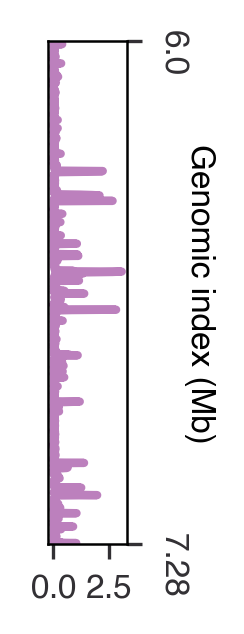

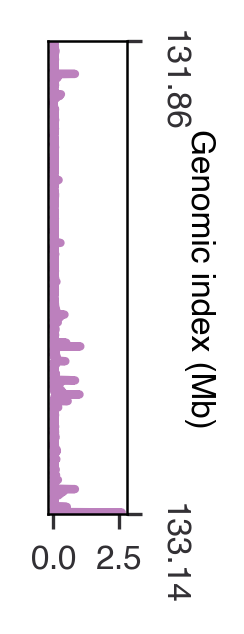

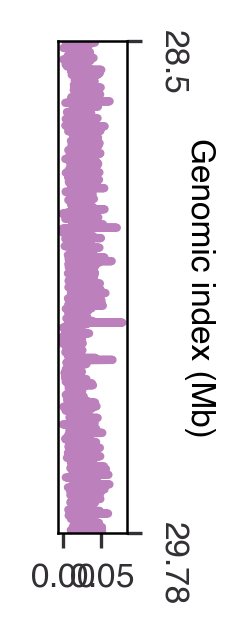

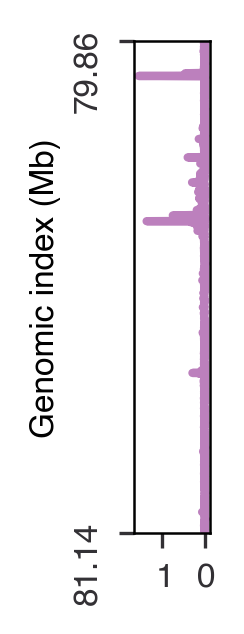

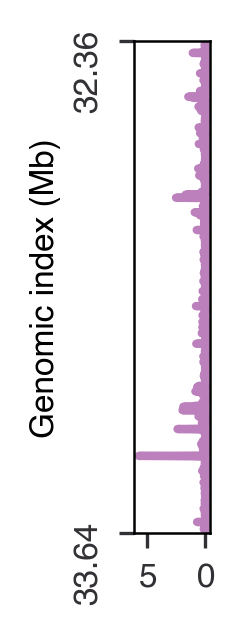

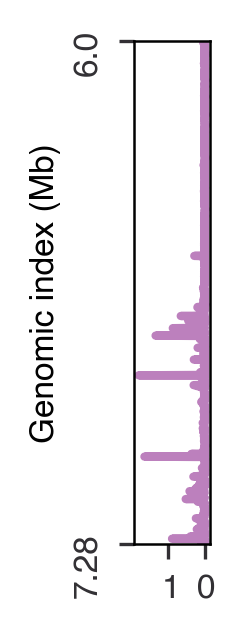

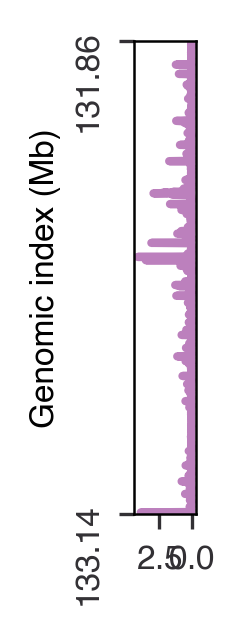

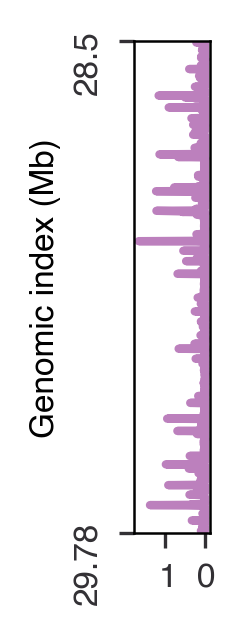

In [11]:
for regions,cell_type in [(gm_regions,'GM'),(imr_regions,'IMR')]:

    for chrom in regions:
        f = gm_fp(chrom) if cell_type=='GM' else imr_fp(chrom)
        dnase_data = pd.read_pickle(f)
        for region_idx,genomic_idx in regions[chrom]:
            orientation = 'left' if cell_type == 'IMR' else 'right'
            fig,ax = plot_dnase(dnase_data[0,genomic_idx:genomic_idx+region_length].toarray().flatten(),genomic_idx,orientation=orientation)
            fig.savefig(save_folder + f'chrom_{chrom}_{genomic_idx}_{cell_type}_dnase.pdf',transparent=True)

In [42]:
temp = dnase_data[0,genomic_idx:genomic_idx+region_length].toarray().flatten()
n = len(temp) // plotting_resolution
temp = temp.reshape(n,plotting_resolution).mean(1)

In [43]:
temp.shape

(1280,)

In [58]:
list(reversed([1,2]))

[2, 1]

In [109]:
ax.get_xticklabels()

[Text(-2.5, 0, '$\\mathdefault{−2.5}$'),
 Text(0.0, 0, '$\\mathdefault{0.0}$'),
 Text(2.5, 0, '$\\mathdefault{2.5}$'),
 Text(5.0, 0, '$\\mathdefault{5.0}$')]

In [ ]:
ax.axis["left"].major_ticklabels.set_ha("center")

In [93]:
ax.yaxis.get_ticklabels()[0]

matplotlib.text.Text

In [96]:
plt.text

<function matplotlib.pyplot.text(x, y, s, fontdict=None, **kwargs)>

In [121]:
17 * 8 / .3333

408.04080408040807

In [57]:
(24.785/24.044) * 24.785

25.54883650806854

In [58]:
(5.306 - 4.248) + 58.228

59.286

In [59]:
0.267 + 64.142

64.40899999999999

In [1]:
import pandas as pd
rosetta = pd.read_pickle('../data/embeddings_64_after_transformer/rosetta_stone.pkl')

In [4]:
regions = {
    '1':[8_680_000,29_020_000],
    '22':[26_260_000]
}

for chrom,starts in regions.items():

    for i,(_,_,start) in enumerate(rosetta[chrom]):
        if start in starts:
            print(start,i)
    

8680000 395
29020000 1325
26260000 464


In [ ]:
(25.787 / 25.787)* 27.086